In [219]:
import math
import numpy as np

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()
sns.set_context("paper", font_scale=1.2)
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


In [186]:
df = pd.read_csv("fine_scores.csv")

In [187]:
# convert 100000 in loss to nan
df['loss'] = df['loss'].replace(1000000.000000, np.nan)
df.dropna(inplace=True)

In [188]:
# rename columns yaw to roll, pitch to yaw, roll to pitch
df = df.rename(columns={'yaw': 'roll', 'pitch': 'yaw', 'roll': 'pitch'})

In [189]:
df['og_roll'] = df['roll']
df['roll'] = df['roll'].apply(lambda x: x % 360)
# df['pitch'] = df['pitch'].apply(lambda x: x % 360)
df['yaw'] = df['yaw'].apply(lambda x: x % 360)
# start real roll from roll index 0 and decreasing -5 each time wrappring around % 360
df['og_real_roll'] = (df['roll'][0] - 5 * df['img_number'])
df['real_roll'] = df['og_real_roll'].apply(lambda x: x % 360)

/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

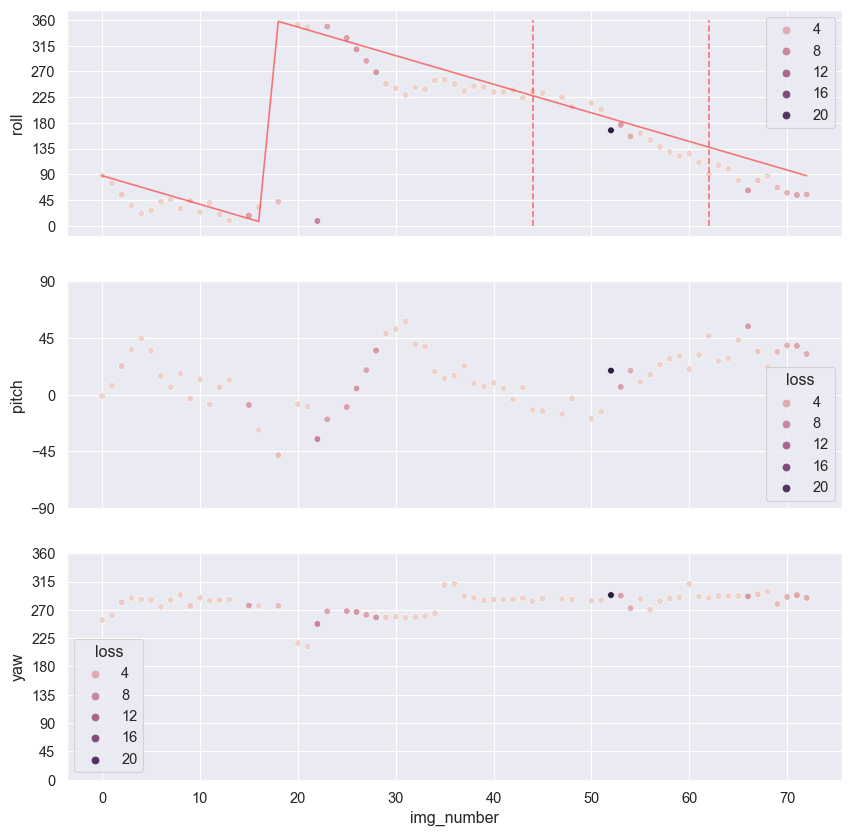

In [190]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df, x='img_number', y='roll', hue='loss');
axes[0].set_yticks(range(0, 361, 45));
sns.lineplot(ax=axes[0], data=df, x='img_number', y='real_roll', color='red', alpha=0.5);
axes[0].vlines(x=44, ymin=0, ymax=360, color='red', linestyles='dashed', alpha=0.5)
axes[0].vlines(x=62, ymin=0, ymax=360, color='red', linestyles='dashed', alpha=0.5)
sns.scatterplot(ax=axes[1], data=df, x='img_number', y='pitch', hue='loss');
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df, x='img_number', y='yaw', hue='loss');
axes[2].set_yticks(range(0, 361, 45));

/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='og_real_roll', ylabel='og_roll'>

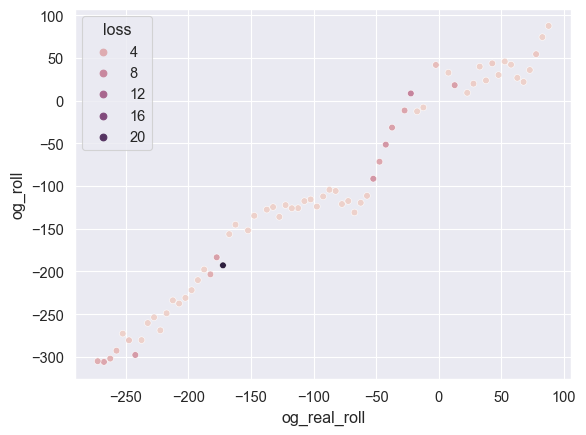

In [191]:
sns.scatterplot(data=df, x='og_real_roll', y='og_roll', hue='loss')

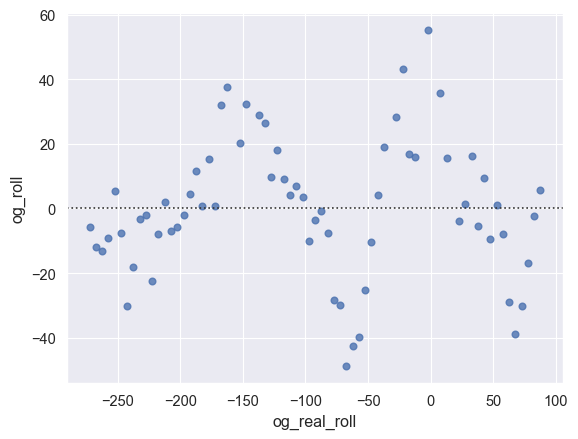

In [192]:
# make residual plot from real roll and roll
sns.residplot(data=df, x='og_real_roll', y='og_roll');

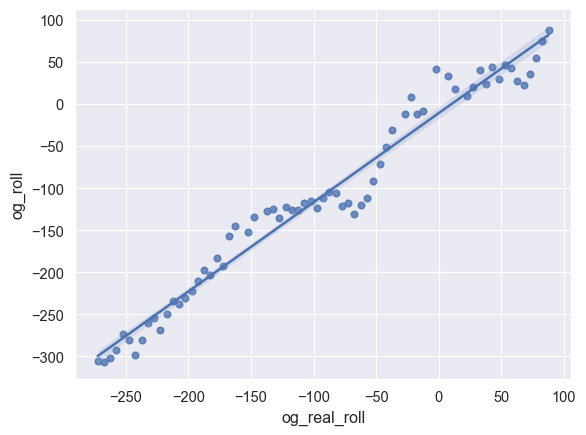

In [193]:
ax = sns.regplot(data=df, x='og_real_roll', y='og_roll');

In [213]:
# df['rounded_loss'] to nearest 1 decimal place
df['rounded_loss'] = df['loss'].apply(lambda x: round(x, 0))

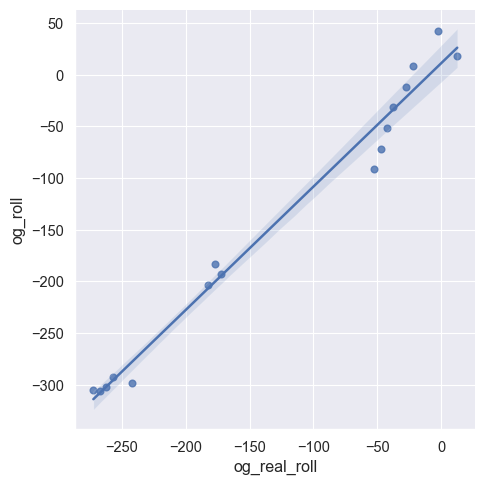

In [217]:
sns.lmplot(data=df[df['rounded_loss'] > 1], x='og_real_roll', y='og_roll');

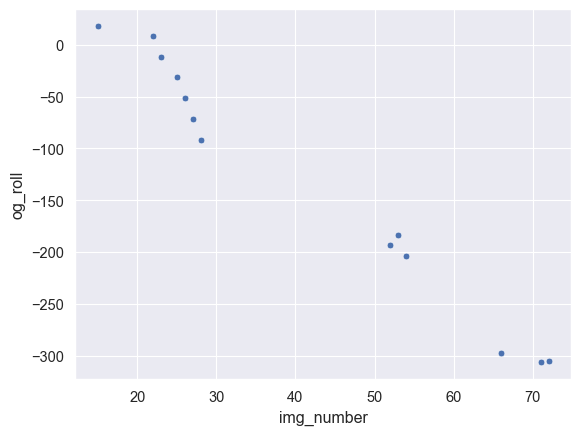

In [225]:
sns.scatterplot(data=df[df['rounded_loss'] > 3], y='og_roll', x='img_number');

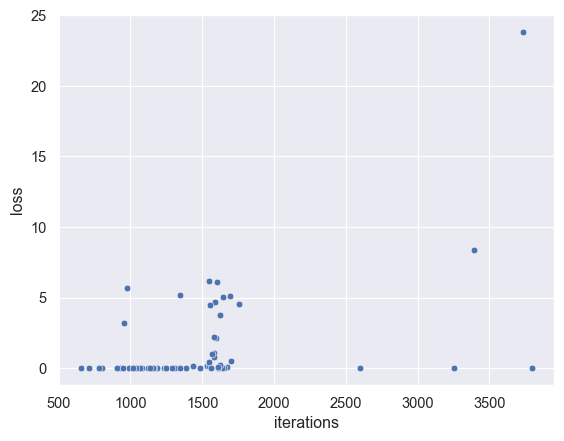

In [226]:
sns.scatterplot(data=df, y='loss', x='iterations');


In [196]:
# mse of real roll and roll
np.mean((df['og_real_roll'] - df['og_roll']) ** 2)


756.8890452029517

In [197]:
# df['approx_pitch'] should be the pitch rounded to nearest 5
df['approx_pitch'] = df['pitch'].apply(lambda x: round(x / 10) * 10)